## Classifying Password Strength with Machine Learning


In [1]:
# EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# ml pkgs

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("cleanpasswordlist.csv")

In [5]:
df.head()

,Unnamed: 0,password,strength
0,0,kzde5577,1
1,1,kino3434,1
2,2,visi7k1yr,1
3,3,megzy123,1
4,4,lamborghin1,1


In [6]:
df.columns

Index(['Unnamed: 0', 'password', 'strength'], dtype='object')

In [7]:
df= df[['password', 'strength']]

In [8]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [9]:
df.describe()

,strength
count,669425.000000
mean,0.990217
std,0.507936
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669425 entries, 0 to 669424
Data columns (total 2 columns):
password    669424 non-null object
strength    669425 non-null int64
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [14]:
df.isnull().sum()

password    1
strength    0
dtype: int64

In [15]:
df.isna().sum()

password    1
strength    0
dtype: int64

In [17]:
df['strength'].unique()

array([1, 2, 0], dtype=int64)

In [16]:
# check value counts for strength
df['strength'].value_counts()

1    496650
0     89662
2     83113
Name: strength, dtype: int64

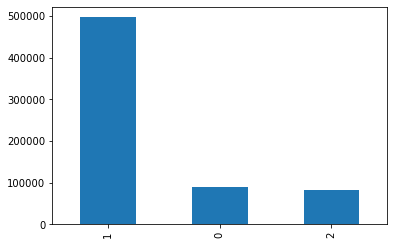

In [23]:
df['strength'].value_counts().plot(kind='bar')

In [27]:
# Longest p.w

df['password'].str.len().idxmax()


26951

In [28]:
df.iloc[26951]

password    In0LnUoff8wfayJGqzelyDqg4AMl9gBhgl3T2iZeONzh5g...
strength                                                    2
Name: 26951, dtype: object

In [29]:
 # smallest pw
df['password'].str.len().idxmin()



459739

In [30]:
df.iloc[459739]

password    M
strength    0
Name: 459739, dtype: object

In [31]:
# fill null value unknown

df['password'] = df['password'].fillna('unknown')


In [32]:
x = df['password']
y = df['strength']

In [35]:
x.shape

(669425,)

In [36]:
y.shape

(669425,)

In [38]:
vet = CountVectorizer()
X = vet.fit_transform(x)

In [39]:
x

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669420      10redtux10
669421       infrared1
669422    184520socram
669423       marken22a
669424        fxx4pw4g
Name: password, Length: 669425, dtype: object

In [43]:
X.shape

(669425, 672328)

In [44]:
# Split Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [45]:
# Model Building 

In [46]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
print("Accuracy :",log_model.score(X_test, y_test))

Accuracy : 0.7444280677993108


In [50]:
X_predict =['password',
             '123456']

X_predict_1 = vet.transform(X_predict)
y_predict_1 =log_model.predict(X_predict_1)
print("Password Strength is {}".format(y_predict_1))

Password Strength is [1 1]


In [65]:
# Thanks
# By Arun Sarathi
